# <center>ANALYSIS BY GROUP OF WORDS</center>
***
## <font color = blue>I. LIBRARIES AND LOADING DATA</font>

## <font color = blue>II. ANALYSIS</font>
> A. ANALYSIS BY GROUP OF 2 WORDS<br>
> B. ANALYSIS BY GROUP OF 3 WORDS<br>
> C. ANALYSIS BY GROUP OF 4 WORDS<br>
> D. ANALYSIS BY GROUP OF 10 WORDS<br>

***

## <font color = blue>I. LIBRARIES AND LOADING DATA</font>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from helpers import read_image

In [2]:
df = pd.read_csv('../data/data_with_text_final.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,filename,url,description,type,filepath,scraped,old_filename,old_filepath,height,width,channels,landscape,text,lang_code,lang_conf,text_ocr
0,0,0,img_0000000.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000000.jpg,1,img_0000000.jpg,./facture/img_0000000.jpg,1061.0,750.0,3.0,0.0,facture logo joanna binet coubertin paris fact...,fr,0.704567,FACTURE LOGO Joanna Binet 48 Coubertin 31400 ...
1,1,1,img_0000001.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000001.jpg,1,img_0000001.jpg,./facture/img_0000001.jpg,1061.0,750.0,3.0,0.0,joanna binet coubertin paris facture facturé c...,fr,0.798047,Joanna Binet 48 Coubertin 31400 Paris FACTURE...
2,2,2,img_0000002.jpg,https://www.coover.fr/wp-content/uploads/2021/...,Facture proforma : modèle à télécharger gratui...,facture,./final/img_0000002.jpg,1,img_0000002.jpg,./facture/img_0000002.jpg,1024.0,726.0,3.0,0.0,facture entreprise société adresse postale adr...,fr,0.985557,FACTURE Mon entreprise : Nom de la société Ad...
3,3,3,img_0000003.jpg,https://templates.invoicehome.com/modele-factu...,100 modèles gratuits de factures | Téléchargem...,facture,./final/img_0000003.jpg,1,img_0000003.jpg,./facture/img_0000003.jpg,1061.0,750.0,3.0,0.0,joanna binet coubertin paris facture cendrillo...,fr,0.738264,Joanna Binet 48 Coubertin 31400 Paris FACTURE...
4,4,4,img_0000004.jpg,https://files.intum.com/v/vosfactures/files/31...,Base de Connaissances - Vos Factures - Créer u...,facture,./final/img_0000004.jpg,1,img_0000004.jpg,./facture/img_0000004.jpg,771.0,773.0,3.0,1.0,payer ligne facture sfideli date création date...,fr,0.575626,Payer en ligne > FACTURE No SFIDELI F/05.2020...


In [3]:
# We remove rows with empty text after OCR
df = df.dropna(subset = ['text'])

## <font color = blue>II. ANALYSIS</font>
> A. ANALYSIS BY GROUP OF 2 WORDS<br>

In [4]:
# Method extracting/counting group of words
def return_ngram(texts, ngram_range = (1,1)):
    vectorizer = CountVectorizer(ngram_range = ngram_range)
    vectorizer.fit(texts)
    count_list = np.array(vectorizer.transform(texts).sum(0))[0]
    count_words = list(zip(vectorizer.get_feature_names(), count_list))
    count_words = sorted(count_words, key = lambda x: x[1], reverse = True)
    count_words = pd.DataFrame(count_words, columns = ['word', 'count'])
    return count_words

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


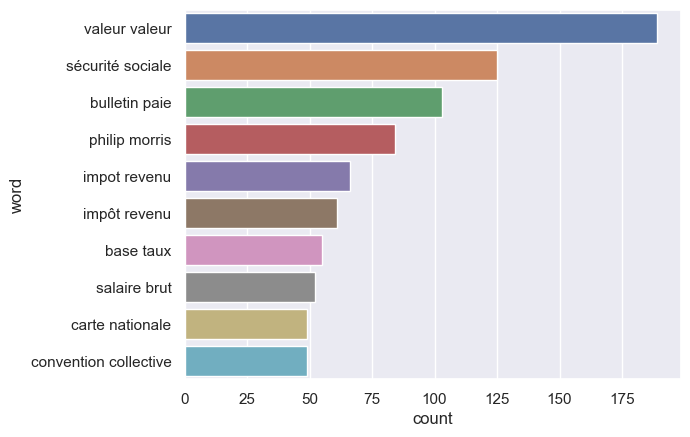

In [5]:
sns.set()
count_words = return_ngram(df.text, ngram_range = (2, 2))
sns.barplot(x = 'count', y = 'word', data = count_words.head(10));

> B. ANALYSIS BY GROUP OF 3 WORDS<br>

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


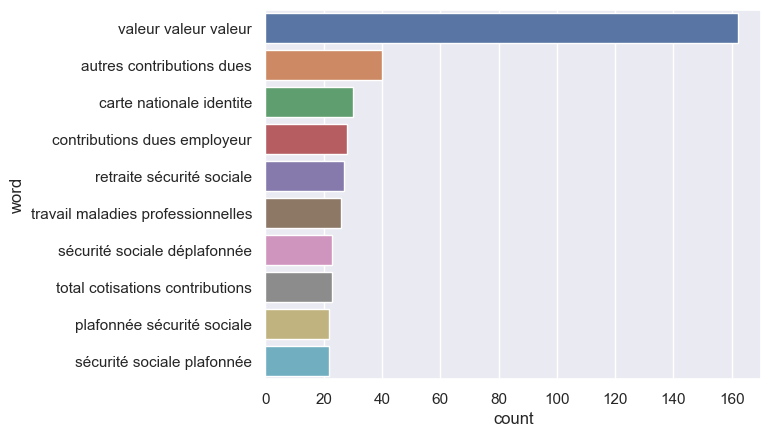

In [6]:
count_words = return_ngram(df.text, ngram_range = (3, 3))
sns.barplot(x = 'count', y = 'word', data = count_words.head(10));

> C. ANALYSIS BY GROUP OF 4 WORDS<br>

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


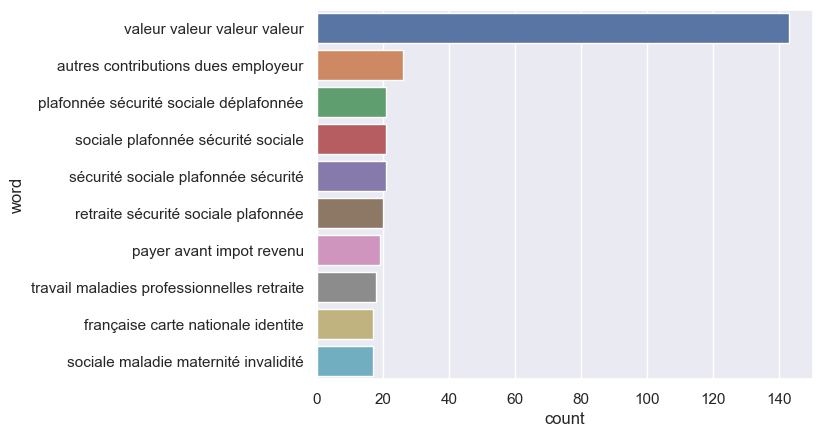

In [7]:
count_words = return_ngram(df.text, ngram_range = (4, 4))
sns.barplot(x = 'count', y = 'word', data = count_words.head(10));

**Search for text with words 'valeur valeur valeur valeur'**

img_0000383.jpg


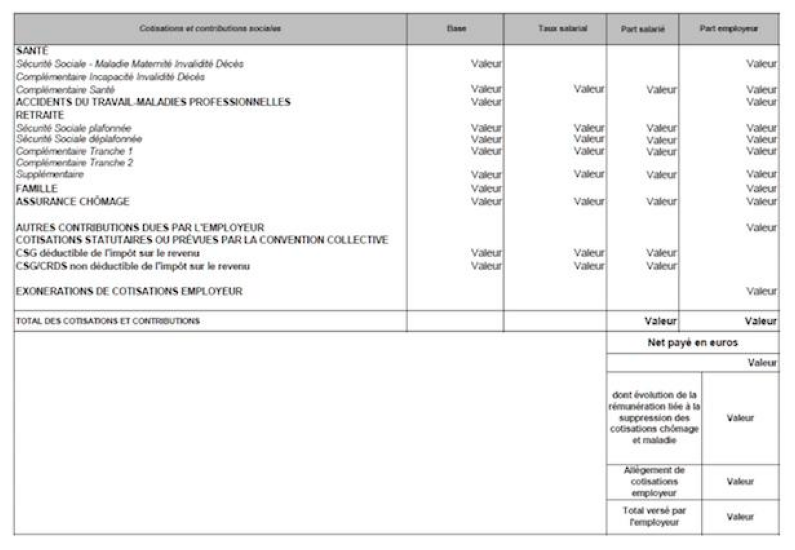

img_0000398.jpg


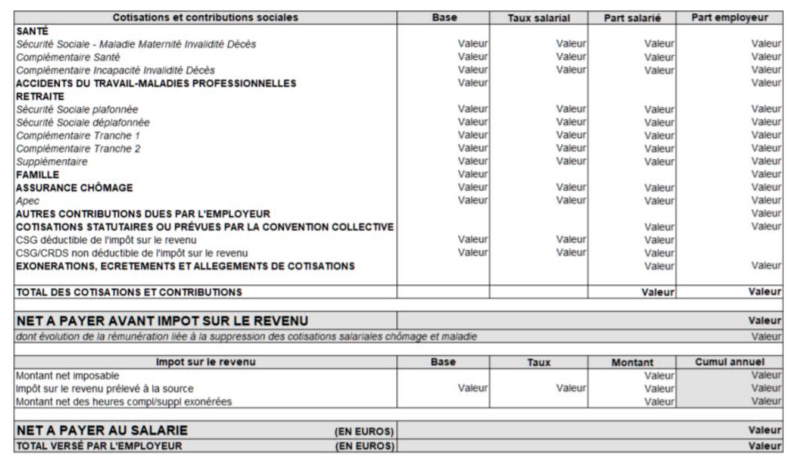

img_0000419.jpg


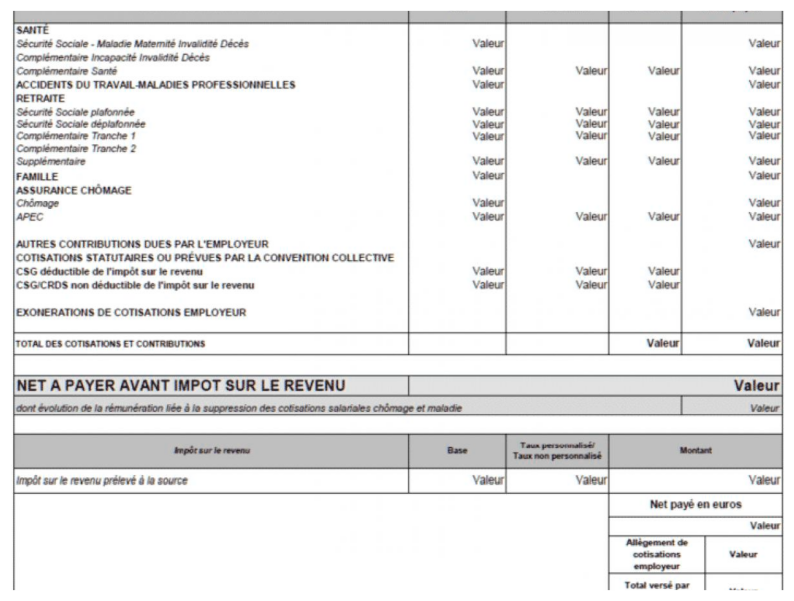

img_0000454.jpg


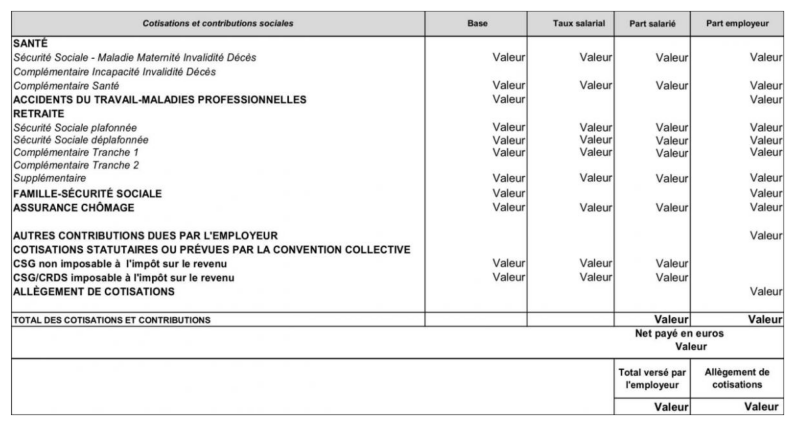

img_0000517.jpg


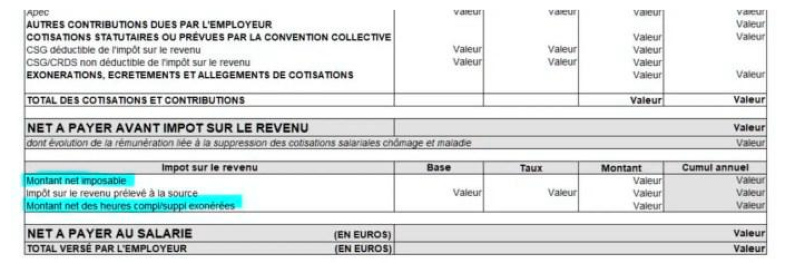

In [8]:
for row_id in df.index:
    if 'valeur valeur valeur valeur' in df.text[row_id]:
        print(df.filename[row_id])
        plt.figure(figsize = (10, 10))
        img = read_image(df.filename[row_id])
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.show()

> D. ANALYSIS BY GROUP OF 10 WORDS<br>

C:\Users\Asus\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


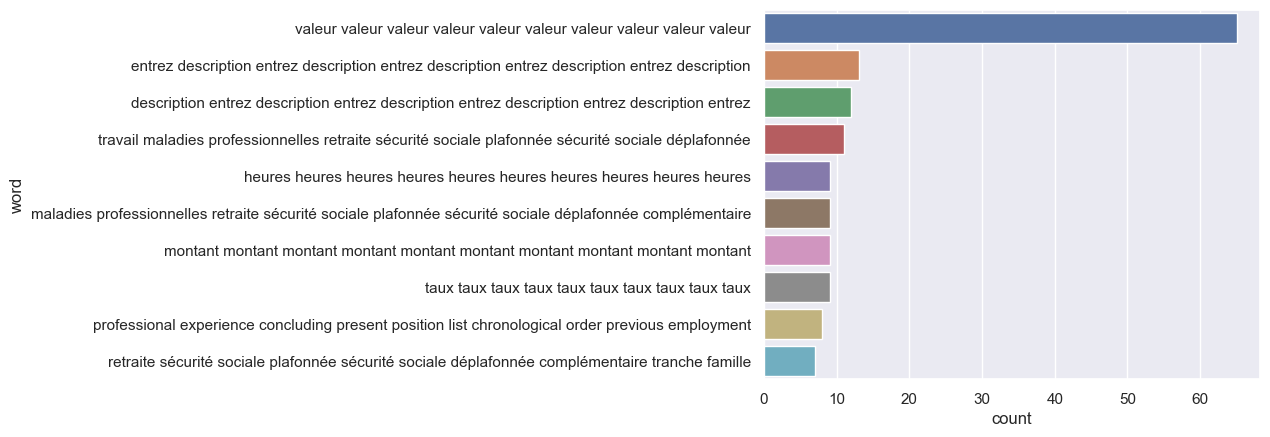

In [9]:
count_words = return_ngram(df.text, ngram_range = (10, 10))
sns.barplot(x = 'count', y = 'word', data = count_words.head(10));